# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_results = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [146]:
# Checking the number of mice.
combined_results['Mouse ID'].nunique()

249

In [147]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_results[combined_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [148]:
# Optional: Get all the data for the duplicate mouse ID.


In [149]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_results = combined_results[combined_results['Mouse ID'] != 'g989']
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [150]:
# Checking the number of mice in the clean DataFrame.
combined_results['Mouse ID'].nunique()


248

## Summary Statistics

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean Tumor Vol', 'Median Tumor Vol', 'Tumor Vol Variance', 'Tumor Vol Standard Deviation', 'Tumor Vol Standard Error']
summary_stats

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Timepoints'>

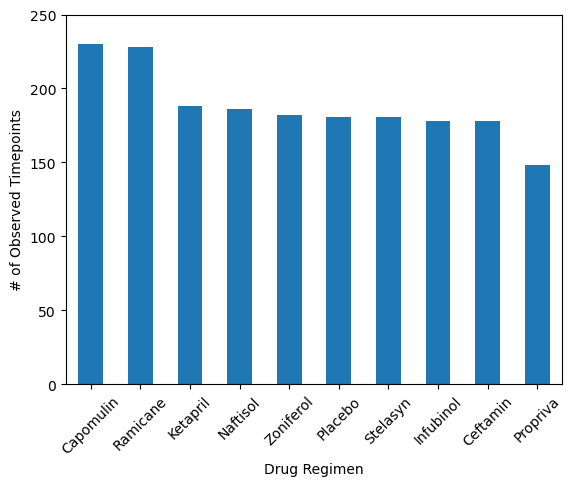

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_timepoints = combined_results['Drug Regimen'].value_counts()
observed_timepoints.plot(kind='bar', yticks=[0, 50, 100, 150, 200, 250], rot=45, xlabel='Drug Regimen', ylabel='# of Observed Timepoints')


<function matplotlib.pyplot.show(close=None, block=None)>

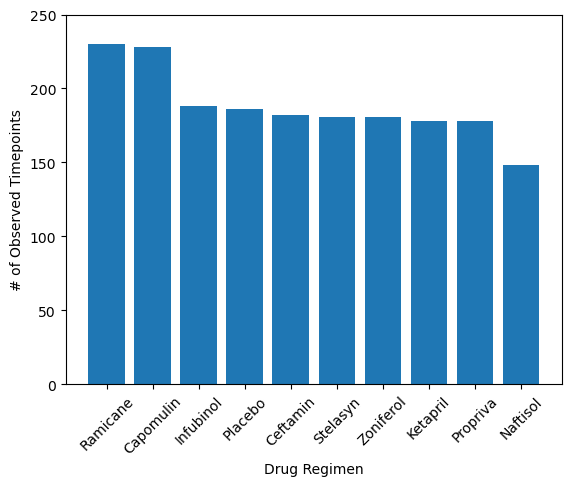

In [154]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
observed_timepoints = combined_results['Drug Regimen'].value_counts()
plt.bar(combined_results['Drug Regimen'].unique(), observed_timepoints)
plt.yticks([0, 50, 100, 150, 200, 250])
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.show


<Axes: ylabel='Count'>

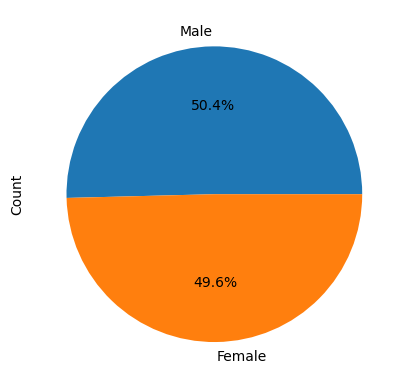

In [155]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_by_sex = combined_results.drop_duplicates(subset=['Mouse ID'])
# Make the pie chart
sex_counts = mice_by_sex['Sex'].value_counts()
sex_counts.plot(kind='pie', labels = sex_counts.index, autopct='%1.1f%%', ylabel='Count')

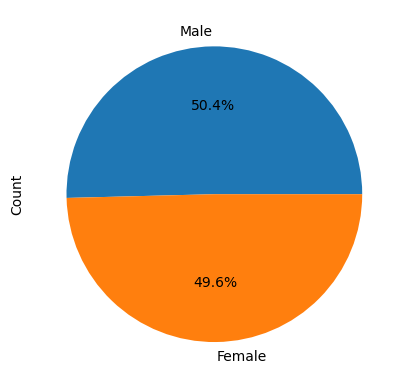

In [156]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_by_sex = combined_results.drop_duplicates(subset=['Mouse ID'])
# Make the pie chart
sex_counts = mice_by_sex['Sex'].value_counts()
plt.pie(sex_counts, labels = sex_counts.index, autopct='%1.1f%%')
plt.ylabel("Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Filter data frame to just those treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
combined_results_filtered = combined_results[combined_results['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = combined_results.groupby('Mouse ID')['Timepoint'].max()
final_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_results_final_volumes = pd.merge(final_timepoints, combined_results_filtered, on=['Mouse ID', 'Timepoint'])
combined_results_final_volumes

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [158]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
q1 = combined_results_final_volumes['Tumor Volume (mm3)'].quantile(.25).round(3)
q3 = combined_results_final_volumes['Tumor Volume (mm3)'].quantile(.75).round(3)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volumes = combined_results_final_volumes['Tumor Volume (mm3)'].tolist()

# Determine outliers using upper and lower bounds
tumor_volumes_outliers = [vol for vol in tumor_volumes if vol > upper_bound or vol < lower_bound]
tumor_volumes_outliers


[]

<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

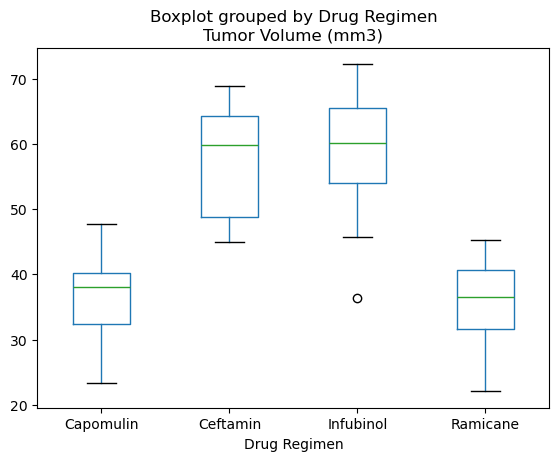

In [159]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
combined_results_final_volumes.boxplot(column = 'Tumor Volume (mm3)', by = 'Drug Regimen', grid = False)

## Line and Scatter Plots

<Axes: title={'center': 'Tumor volume, mouse ID y793'}, xlabel='Timepoint', ylabel='Tumor Vol (mm3)'>

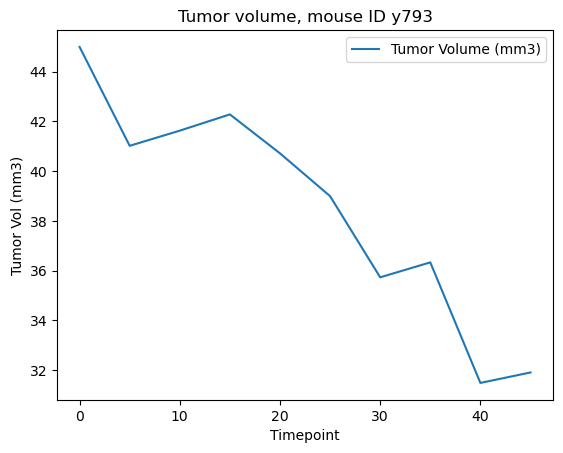

In [160]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse_df = combined_results[combined_results['Mouse ID'] == 'y793']
single_mouse_df.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)', xlabel = 'Timepoint', ylabel = 'Tumor Vol (mm3)', title = 'Tumor volume, mouse ID y793' )

<Axes: title={'center': 'Average mouse weight vs. tumor volume for mice treated with Capomulin'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

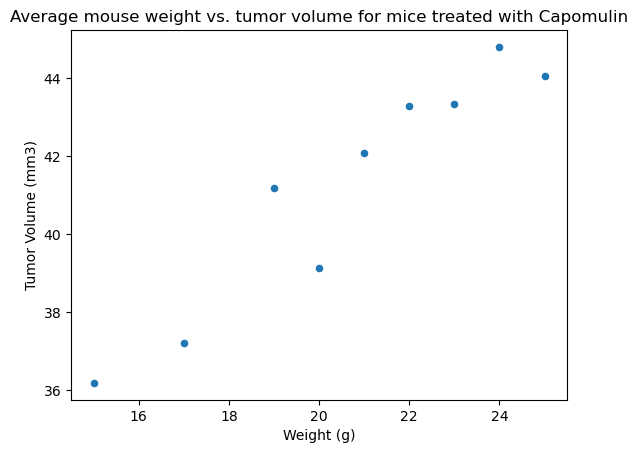

In [171]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice_df = combined_results[combined_results['Drug Regimen'] == 'Capomulin']
capomulin_mice_avg_weight_df = capomulin_mice_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_mice_avg_weight_df.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', title = 'Average mouse weight vs. tumor volume for mice treated with Capomulin')

## Correlation and Regression

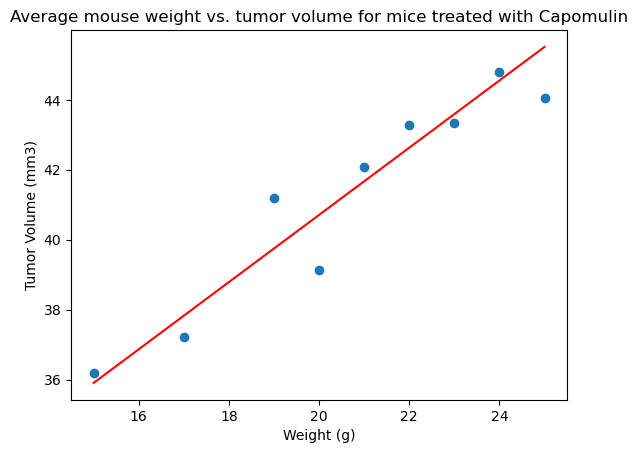

Correlation coefficient between weight and tumor volume: 0.525699555207717
Linear regression line: 0.9609669432428368x + 21.48982721329954


In [172]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation coefficient
corr = capomulin_mice_df['Weight (g)'].corr(capomulin_mice_df['Tumor Volume (mm3)'])

# Calculate linear regression line components
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_mice_df['Weight (g)'], capomulin_mice_df['Tumor Volume (mm3)'])
line = slope * capomulin_mice_avg_weight_df['Weight (g)'] + intercept

plt.scatter(capomulin_mice_avg_weight_df['Weight (g)'], capomulin_mice_avg_weight_df['Tumor Volume (mm3)'])
plt.plot(capomulin_mice_avg_weight_df['Weight (g)'], line, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average mouse weight vs. tumor volume for mice treated with Capomulin')
plt.show()
print(f'Correlation coefficient between weight and tumor volume: {corr}')
print(f'Linear regression line: {slope}x + {intercept}')